<a href="https://www.kaggle.com/code/hknaralasetty/automobile-classification-using-knn-97-accuracy?scriptVersionId=98996709" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/automobile-dataset/Automobile_data.csv


In [2]:
import pandas as pd 

data = pd.read_csv('/kaggle/input/automobile-dataset/Automobile_data.csv')
data.sample(5)

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
40,0,85,honda,gas,std,four,sedan,fwd,front,96.5,...,110,1bbl,3.15,3.58,9.0,86,5800,27,33,10295
176,-1,65,toyota,gas,std,four,sedan,fwd,front,102.4,...,122,mpfi,3.31,3.54,8.7,92,4200,27,32,10898
99,0,106,nissan,gas,std,four,hatchback,fwd,front,97.2,...,120,2bbl,3.33,3.47,8.5,97,5200,27,34,8949
157,0,91,toyota,gas,std,four,hatchback,fwd,front,95.7,...,98,2bbl,3.19,3.03,9.0,70,4800,30,37,7198
101,0,128,nissan,gas,std,four,sedan,fwd,front,100.4,...,181,mpfi,3.43,3.27,9.0,152,5200,17,22,13499


In [3]:
data.replace("?", np.nan, inplace = True)
data.replace(np.inf, np.nan, inplace = True)
data.isna().sum()
data.replace([-np.inf, np.inf], np.nan, inplace=True)
data.isnull().sum()

symboling             0
normalized-losses    41
make                  0
fuel-type             0
aspiration            0
num-of-doors          2
body-style            0
drive-wheels          0
engine-location       0
wheel-base            0
length                0
width                 0
height                0
curb-weight           0
engine-type           0
num-of-cylinders      0
engine-size           0
fuel-system           0
bore                  4
stroke                4
compression-ratio     0
horsepower            2
peak-rpm              2
city-mpg              0
highway-mpg           0
price                 4
dtype: int64

In [4]:
from sklearn.preprocessing import LabelEncoder

def encode( datatype ):
    le = LabelEncoder()
    for i in datatype:
        if datatype[i].dtype=='object':
            datatype[i] = le.fit_transform(datatype[i])
        
    

In [5]:
encode(data)

data

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,31
1,3,51,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,50
2,1,51,0,1,0,1,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,50
3,2,27,1,1,0,0,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,36
4,2,27,1,1,0,0,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,49,21,1,0,0,3,2,0,109.1,...,141,5,35,15,9.5,7,15,23,28,56
201,-1,49,21,1,1,0,3,2,0,109.1,...,141,5,35,15,8.7,23,14,19,25,73
202,-1,49,21,1,0,0,3,2,0,109.1,...,173,5,26,7,8.8,13,16,18,23,77
203,-1,49,21,0,1,0,3,2,0,109.1,...,145,3,6,24,23.0,3,8,26,27,79


In [6]:
data.isna().sum()

symboling            0
normalized-losses    0
make                 0
fuel-type            0
aspiration           0
num-of-doors         0
body-style           0
drive-wheels         0
engine-location      0
wheel-base           0
length               0
width                0
height               0
curb-weight          0
engine-type          0
num-of-cylinders     0
engine-size          0
fuel-system          0
bore                 0
stroke               0
compression-ratio    0
horsepower           0
peak-rpm             0
city-mpg             0
highway-mpg          0
price                0
dtype: int64

In [7]:
data.describe().transpose()
data[~data.isin([np.nan, np.inf, -np.inf]).any(1)]

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,51,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,31
1,3,51,0,1,0,1,0,2,0,88.6,...,130,5,23,4,9.0,5,10,21,27,50
2,1,51,0,1,0,1,2,2,0,94.5,...,152,5,1,27,9.0,20,10,19,26,50
3,2,27,1,1,0,0,3,1,0,99.8,...,109,5,13,24,10.0,2,16,24,30,36
4,2,27,1,1,0,0,3,0,0,99.4,...,136,5,13,24,8.0,8,16,18,22,61
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,-1,49,21,1,0,0,3,2,0,109.1,...,141,5,35,15,9.5,7,15,23,28,56
201,-1,49,21,1,1,0,3,2,0,109.1,...,141,5,35,15,8.7,23,14,19,25,73
202,-1,49,21,1,0,0,3,2,0,109.1,...,173,5,26,7,8.8,13,16,18,23,77
203,-1,49,21,0,1,0,3,2,0,109.1,...,145,3,6,24,23.0,3,8,26,27,79


In [8]:
from sklearn.preprocessing import MinMaxScaler 

scaler = MinMaxScaler()
scaled = scaler.fit_transform(data)
pd.DataFrame(scaled)

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,1.0,1.000000,0.000000,1.0,0.0,0.5,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.605263,0.111111,0.12500,0.084746,0.434783,0.222222,0.289474,0.166667
1,1.0,1.000000,0.000000,1.0,0.0,0.5,0.00,1.0,0.0,0.058309,...,0.260377,0.714286,0.605263,0.111111,0.12500,0.084746,0.434783,0.222222,0.289474,0.268817
2,0.6,1.000000,0.000000,1.0,0.0,0.5,0.50,1.0,0.0,0.230321,...,0.343396,0.714286,0.026316,0.750000,0.12500,0.338983,0.434783,0.166667,0.263158,0.268817
3,0.8,0.529412,0.047619,1.0,0.0,0.0,0.75,0.5,0.0,0.384840,...,0.181132,0.714286,0.342105,0.666667,0.18750,0.033898,0.695652,0.305556,0.368421,0.193548
4,0.8,0.529412,0.047619,1.0,0.0,0.0,0.75,0.0,0.0,0.373178,...,0.283019,0.714286,0.342105,0.666667,0.06250,0.135593,0.695652,0.138889,0.157895,0.327957
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,0.2,0.960784,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,...,0.301887,0.714286,0.921053,0.416667,0.15625,0.118644,0.652174,0.277778,0.315789,0.301075
201,0.2,0.960784,1.000000,1.0,1.0,0.0,0.75,1.0,0.0,0.655977,...,0.301887,0.714286,0.921053,0.416667,0.10625,0.389831,0.608696,0.166667,0.236842,0.392473
202,0.2,0.960784,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,...,0.422642,0.714286,0.684211,0.194444,0.11250,0.220339,0.695652,0.138889,0.184211,0.413978
203,0.2,0.960784,1.000000,0.0,1.0,0.0,0.75,1.0,0.0,0.655977,...,0.316981,0.428571,0.157895,0.666667,1.00000,0.050847,0.347826,0.361111,0.289474,0.424731


<AxesSubplot:>

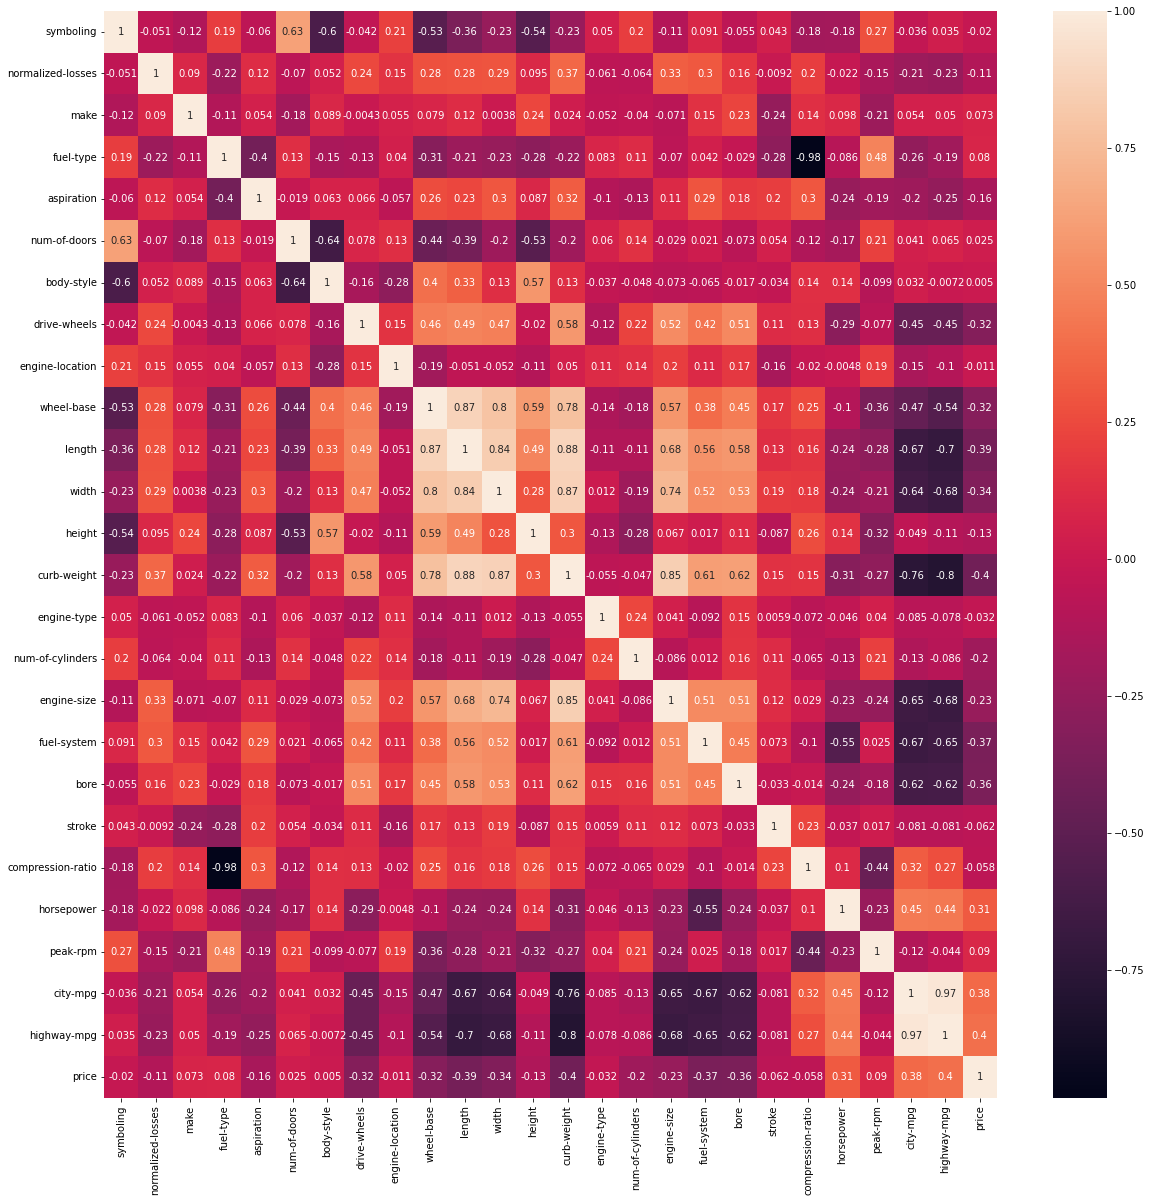

In [9]:
import seaborn as sns 
import matplotlib.pyplot as plt 

plt.figure( figsize = (20, 20))
sns.heatmap( data = data.corr(), annot = True)

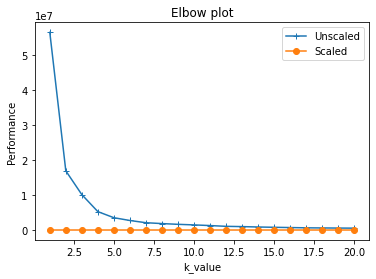

In [10]:
from sklearn.cluster import KMeans

ran = range(1, 21)
performance, performance2 = [], []
for k in ran:
    km = KMeans(n_clusters = k )
    km.fit(data)
    performance.append(km.inertia_)
    
for k in ran:
    km = KMeans(n_clusters = k )
    km.fit(scaled)
    performance2.append(km.inertia_)

plt.plot(ran, performance, '-+', label = 'Unscaled')
plt.plot(ran, performance2, '-o', label = 'Scaled')
plt.xlabel('k_value')
plt.ylabel('Performance')
plt.title('Elbow plot')
plt.legend()
plt.show()
    

[56516236.18469562, 16914947.15924993, 10117317.500836993, 5257801.918055331, 3517991.2488468927, 2720366.0127409543, 2085166.9915422583, 1838637.563155262, 1625455.3830927766, 1459995.4612168877, 1273486.3136422553, 1052919.0673398492, 974720.7145920815, 862920.4046535976, 777853.4637070007, 703587.9107609577, 625872.1333736887, 589345.7504540998, 558437.5676408934, 530181.2588004238]


<AxesSubplot:>

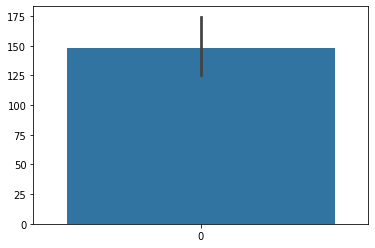

In [11]:
print(performance)
sns.barplot(data = performance2)

In [12]:
from sklearn import metrics 
from sklearn import cluster

for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i).fit(data).labels_
    print ("Silhouette score for k_clusters) = "+str(i)+" is "+str(metrics.silhouette_score(data,labels,metric="euclidean")))

for i in range(2,13):
    labels=cluster.KMeans(n_clusters=i).fit(scaled).labels_
    print ("Silhouette score for k_clusters) = "+str(i)+" is "+str(metrics.silhouette_score(data,labels,metric="euclidean")))

Silhouette score for k_clusters) = 2 is 0.6131390626518337
Silhouette score for k_clusters) = 3 is 0.5847535372382071
Silhouette score for k_clusters) = 4 is 0.5474552243899095
Silhouette score for k_clusters) = 5 is 0.5301664078263084
Silhouette score for k_clusters) = 6 is 0.49231084787127966
Silhouette score for k_clusters) = 7 is 0.49135342715284613
Silhouette score for k_clusters) = 8 is 0.4433998174936053
Silhouette score for k_clusters) = 9 is 0.4270347103127483
Silhouette score for k_clusters) = 10 is 0.4524945731563956
Silhouette score for k_clusters) = 11 is 0.4428835714422203
Silhouette score for k_clusters) = 12 is 0.4643196850173923
Silhouette score for k_clusters) = 2 is 0.41845982860024844
Silhouette score for k_clusters) = 3 is 0.2551037626883885
Silhouette score for k_clusters) = 4 is 0.14503644887512515
Silhouette score for k_clusters) = 5 is 0.12498745061426327
Silhouette score for k_clusters) = 6 is -0.01704558328225552
Silhouette score for k_clusters) = 7 is -0.051

In [13]:
scaled = pd.DataFrame(scaled)
print(type(scaled))
km = KMeans( n_clusters = 5 )
pred = pd.Series( km.fit_predict(scaled) )
scaled['class'] = pred

<class 'pandas.core.frame.DataFrame'>


In [14]:
pred.value_counts()

0    86
1    41
3    39
2    20
4    19
dtype: int64

In [15]:
scaled.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,class
6,0.6,0.490196,0.047619,1.0,0.0,0.0,0.75,0.5,0.0,0.559767,...,0.714286,0.342105,0.666667,0.09375,0.067797,0.695652,0.166667,0.236842,0.338710,1
204,0.2,0.960784,1.000000,1.0,1.0,0.0,0.75,1.0,0.0,0.655977,...,0.714286,0.921053,0.416667,0.15625,0.118644,0.652174,0.166667,0.236842,0.430108,1
195,0.2,0.725490,1.000000,1.0,0.0,0.0,1.00,1.0,0.0,0.516035,...,0.714286,0.921053,0.416667,0.15625,0.118644,0.652174,0.277778,0.315789,0.161290,1
7,0.6,1.000000,0.047619,1.0,0.0,0.0,1.00,0.5,0.0,0.559767,...,0.714286,0.342105,0.666667,0.09375,0.067797,0.695652,0.166667,0.236842,0.381720,1
177,0.2,0.705882,0.904762,1.0,0.0,0.0,0.50,0.5,0.0,0.460641,...,0.714286,0.421053,0.833333,0.10625,0.932203,0.043478,0.388889,0.421053,0.064516,1


In [16]:
scaled.sample(5)

,0,1,2,3,4,5,6,7,8,9,...,17,18,19,20,21,22,23,24,25,class
202,0.2,0.960784,1.000000,1.0,0.0,0.0,0.75,1.0,0.0,0.655977,...,0.714286,0.684211,0.194444,0.11250,0.220339,0.695652,0.138889,0.184211,0.413978,1
191,0.4,1.000000,0.952381,1.0,0.0,0.0,0.75,0.5,0.0,0.402332,...,0.714286,0.342105,0.666667,0.09375,0.067797,0.695652,0.166667,0.210526,0.155914,1
84,1.0,1.000000,0.523810,1.0,1.0,0.5,0.50,0.5,0.0,0.271137,...,0.857143,0.710526,0.916667,0.00000,0.305085,0.434783,0.166667,0.210526,0.204301,4
178,1.0,0.647059,0.904762,1.0,0.0,0.5,0.50,1.0,0.0,0.475219,...,0.714286,0.394737,0.611111,0.14375,0.406780,0.521739,0.194444,0.210526,0.284946,3
161,0.4,0.901961,0.904762,1.0,0.0,0.0,0.50,0.5,0.0,0.265306,...,0.142857,0.342105,0.250000,0.12500,0.745763,0.347826,0.416667,0.473684,0.854839,0


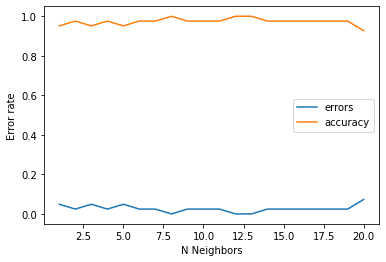

In [17]:
import numpy as np
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


error_rate = []
accuracy = []
run = range(1, 21)

X, y = scaled.drop('class', axis =1 ), scaled['class']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .2, random_state= 49)

for i in run:
    classifier = KNeighborsClassifier(n_neighbors = i)
    knn = classifier.fit(X_train, y_train)
    
    pred = knn.predict(X_test)
    errors = np.mean(pred!=y_test)
    error_rate.append(errors) 
    acc = accuracy_score(pred, y_test)
    accuracy.append(acc)

plt.plot(run, error_rate, label = 'errors')
plt.plot(run, accuracy, label= 'accuracy')
plt.xlabel('N Neighbors')
plt.ylabel('Error rate')
plt.legend()
plt.show()
    

In [18]:
classifier = KNeighborsClassifier(n_neighbors = 15)
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
accuracy_score(pred, y_test)

0.975609756097561